In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
spam_data=pd.read_csv('/content/spam.csv', encoding='latin-1')

In [6]:
spam_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [19]:
filter_data=spam_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [20]:
filter_data=filter_data.rename(columns={'v1' : 'target','v2' : 'message'})

In [21]:
filter_data

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [22]:
X=filter_data['message']
Y=filter_data['target']

In [24]:
tfi=TfidfVectorizer(stop_words='english')

In [25]:
x_reduced=tfi.fit_transform(X)

In [26]:
x_reduced.shape

(5572, 8404)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_reduced,Y,random_state=42,test_size=0.25)

In [28]:
mnb=MultinomialNB()

In [29]:
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
mnb.score(x_train,y_train)

0.9813352476669059

In [31]:
mnb.score(x_test,y_test)

0.9662598707824839

In [32]:
spam_messages=filter_data[filter_data['target']== "spam" ]['message']

In [33]:
normal_messages=filter_data[filter_data['target']=='ham']['message']

In [34]:
spamwords=[word.lower() for word in word_tokenize(str(spam_messages)) if word.lower() not in stopwords.words('english') ]
normalwords=[word.lower() for word in word_tokenize(str(normal_messages)) if word.lower() not in stopwords.words('english') ]

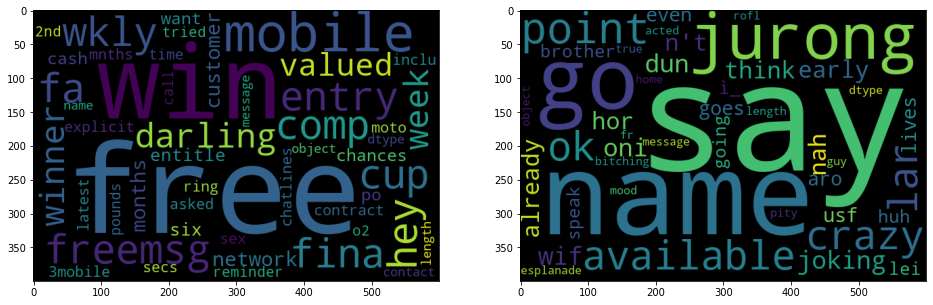

In [35]:
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spamwords))
ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(normalwords))
fig=plt.figure(figsize=(16,16))
a=fig.subplots(1,2)
a[0].imshow(spam_wordcloud)
a[1].imshow(ham_wordcloud)